```
**************************************
* Nama          : Roikhatul Miskiyah *
* Kode Peserta  : PYTN-KS05-010      *
* Batch         : 5                  *
* Project       : 1                  *
**************************************
```

**Kelompok 4**
1. Muhammad Rizaldi - PYTN-KS05-009
2. Roikhatul Miskiyah - PYTN-KS05-010


**Outline:**
```
A. Perkenalan
B. Pustaka yang Dibutuhkan
C. Data Loading 
D. Data Cleaning
E. Eksplorasi Data
F. Data Preprocessing
G. Pendefinisian Model
H. Pelatihan Model
I. Evaluasi Model
J. Model Inference
K. Kesimpulan 
```

# Perkenalan

1. Latar belakang
Adanya perjalanan dari titik awal atau source hingga pada titik tujuan akhir (destination) serangkali menjadikan penentuan harga menjadi tidak pasti dan seringkali terjadi kekeliruan. Oleh karena itu, pada project 1 ini menganalisa bagaimana penentuan harga yang didasarkan pada data distance, type cab, dan surge multiplier
2. Data yang digunakan
Data yang digunakan dalam penelitian ini adalah data lyft, dengan variabel dependen (y) adalah price dan variabel independen (x) yang digunakan untuk adalah cab type, distance dan surge multiplier.
3. Objective yang ingin dicapai
Faktor yang memengaruhi harga berdasarkan distance dan type cab dengan menggunakan model linear regression 

---
# Pustaka yang Dibutuhkan

In [ ]:
pip install plotly

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from time import time
from six import StringIO
from sklearn import tree
import sklearn.tree as tree
from IPython.display import Image
import pydotplus
import joblib
import pickle

---
# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
rideshare_kaggle = '/content/drive/My Drive/Colab Notebooks/rideshare_kaggle.csv'

In [ ]:
df = pd.read_csv(rideshare_kaggle)
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


---
# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Pada langkah di atas tidak ditemukan missing value

In [ ]:
df.shape

(693071, 57)

In [ ]:
#df.isnull()

In [ ]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
df.isnull().sum().sum()

55095

Pada langkah sebelumnya tidak ditemukan missing value, namun ternyata setelah dianalisis lebih jauh terdapat missing value pada kolom price sebanyak 55095. Dari missing value tersebut dilakukan penanganan yaitu menggantinya dengan nilai median dari variablenya.

In [ ]:
df['price'].fillna(df['price'].median(), inplace=True)

In [ ]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Setelah penanganan missing value dan dilakukan pengecekan kembali sehingga missing value teratasi, maka dilakukan cek duplikasi data.

In [ ]:
dup = df.duplicated()
print(dup)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(dup.any())

False


Hasil di atas menunjukkan bahwa tidak terdapat duplikasi data.

---
# Eksplorasi Data

## Analisis Time

In [ ]:
pip install -U kaleido

     |████████████████████████████████| 79.9 MB 117 kB/s 


In [ ]:
def plot_bar(groupby_column):
    df1 =df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)
    fig1.show()

In [ ]:
# visualisasi data perbulan
plot_bar('month')

   month  counts
0     11  286457
1     12  406614


In [ ]:
# visualisasi data perhari
plot_bar('day')

    day  counts
0     1   45240
1     2   44928
2     3   44928
3     4   12636
4     9    1674
5    10    2773
6    13   38531
7    14   44928
8    15   44928
9    16   44928
10   17   44928
11   18   36192
12   26   31587
13   27   76121
14   28   73691
15   29   59974
16   30   45084


In [ ]:
# visualisasi data perjam
plot_bar('hour')

    hour  counts
0      0   32413
1      1   28548
2      2   28548
3      3   27815
4      4   28330
5      5   25008
6      6   27336
7      7   24936
8      8   24275
9      9   28971
10    10   30384
11    11   30384
12    12   30384
13    13   30384
14    14   30384
15    15   30383
16    16   30384
17    17   30384
18    18   30384
19    19   27555
20    20   26782
21    21   27732
22    22   29436
23    23   31931


## Analisis Source 

In [ ]:
plot_bar('source')

                     source  counts
0                  Back Bay   57792
1               Beacon Hill   57403
2         Boston University   57764
3                    Fenway   57757
4        Financial District   58857
5          Haymarket Square   57736
6                 North End   57763
7             North Station   57118
8   Northeastern University   57756
9             South Station   57750
10         Theatre District   57813
11                 West End   57562


## Analisis Destination

In [ ]:
plot_bar('destination')

                destination  counts
0                  Back Bay   57780
1               Beacon Hill   57403
2         Boston University   57764
3                    Fenway   57757
4        Financial District   58851
5          Haymarket Square   57764
6                 North End   57756
7             North Station   57119
8   Northeastern University   57755
9             South Station   57749
10         Theatre District   57798
11                 West End   57575


## Analisis Tipe Cab

In [ ]:
plot_bar('cab_type')

  cab_type  counts
0     Lyft  307408
1     Uber  385663


In [ ]:
df_cab =df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
fig_cab = px.bar(data_frame=df_cab, x="day", y="counts", color="cab_type", barmode="group")
fig_cab.show()

In [ ]:
df_cab2 =df.groupby(by=["hour","cab_type"]).size().reset_index(name="counts")
fig_cab2 = px.bar(data_frame=df_cab2, x="hour", y="counts", color="cab_type", barmode="group")
fig_cab2.show()

## Analisis Price

In [ ]:
# Melihat rata-rata harga berdasarkan source dan destination
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        13.996343
                        Fenway                   13.646161
                        Haymarket Square         17.629047
                        North End                18.999267
                        Northeastern University  13.178676
                        South Station            17.368166
Beacon Hill             Boston University        16.148395
                        Fenway                   15.948071
                        Haymarket Square         13.775246
                        North End                15.129993
                        Northeastern University  16.236111
                        South Station            15.756028
Boston University       Back Bay                 13.953471
                        Beacon Hill              17.012859
                        Financial District       23.300844
                        North Station            19.656435
                        Theatre District         18.276663
                        West End                 18.204098
Fenway                  Back Bay                 13.778176
                        Beacon Hill              16.535343
                        Financial District       22.653445
                        North Station            19.205107
                        Theatre District         17.854022
                        West End                 17.792622
Financial District      Boston University        24.545824
                        Fenway                   22.621248
                        Haymarket Square         13.212948
                        North End                13.205054
                        Northeastern University  21.254856
                        South Station            12.440012
Haymarket Square        Back Bay                 16.592140
                        Beacon Hill              13.351453
                        Financial District       12.792579
                        North Station            12.424642
                        Theatre District         13.663261
                        West End                 12.607416
North End               Back Bay                 19.071002
                        Beacon Hill              15.785038
                        Financial District       13.424135
                        North Station            12.877680
                        Theatre District         15.035328
                        West End                 13.495278
North Station           Boston University        18.501846
                        Fenway                   18.143319
                        Haymarket Square         12.645058
                        North End                13.137830
                        Northeastern University  19.054396
                        South Station            15.225016
Northeastern University Back Bay                 13.683161
                        Beacon Hill              16.576832
                        Financial District       21.865632
                        North Station            19.397613
                        Theatre District         15.933637
                        West End                 17.829995
South Station           Back Bay                 18.660729
                        Beacon Hill              16.976420
                        Financial District       12.520914
                        North Station            15.567792
                        Theatre District         13.916505
                        West End                 15.690529
Theatre District        Boston University        19.814755
                        Fenway                   18.623904
                        Haymarket Square         15.069994
                        North End                15.026191
                        Northeastern University  16.638428
                        South Station            12.937634
West End                Boston University 

In [ ]:
# Melihat harga maksimum
print('Harga Maksimum :',df.price.max())
df[df['price']==df.price.max()]

Harga Maksimum : 97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,lyft_luxsuv,Lux Black XL,97.5,4.43,2.0,42.3503,-71.081,35.52,35.52,Clear,Light rain in the morning and overnight.,0.0,0.0,0.82,1.85,2.37,1543672800,9.846,44.65,1543690800,34.88,1543712400,43.98,1543690800,35.53,1543712400,clear-night,30.46,1023.52,146,0.12,0,9.846,274.6,1543665335,1543698860,0.82,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


Hasil diatas menunjukkan bahwa harga tertinggi  berada pada source Financial District dan destination Fenway yakni 97.5. Namun melihat dari tabel source diatas rata-rata hanya dikisaran 23.4, yang membuat perbedaan jauh. Sehingga bisa dikatakan bahwa harga tertinggi  dikategorikan sebagai outlier.

---
# Data Preprocessing

## Time dan Location Dengan Price

In [ ]:
time_col = ['hour','day','month','latitude','longitude','price']

In [ ]:
df_time = df[time_col]
df_time.head()

,hour,day,month,latitude,longitude,price
0,9,16,12,42.2148,-71.033,5.0
1,2,27,11,42.2148,-71.033,11.0
2,1,28,11,42.2148,-71.033,7.0
3,4,30,11,42.2148,-71.033,26.0
4,3,29,11,42.2148,-71.033,9.0


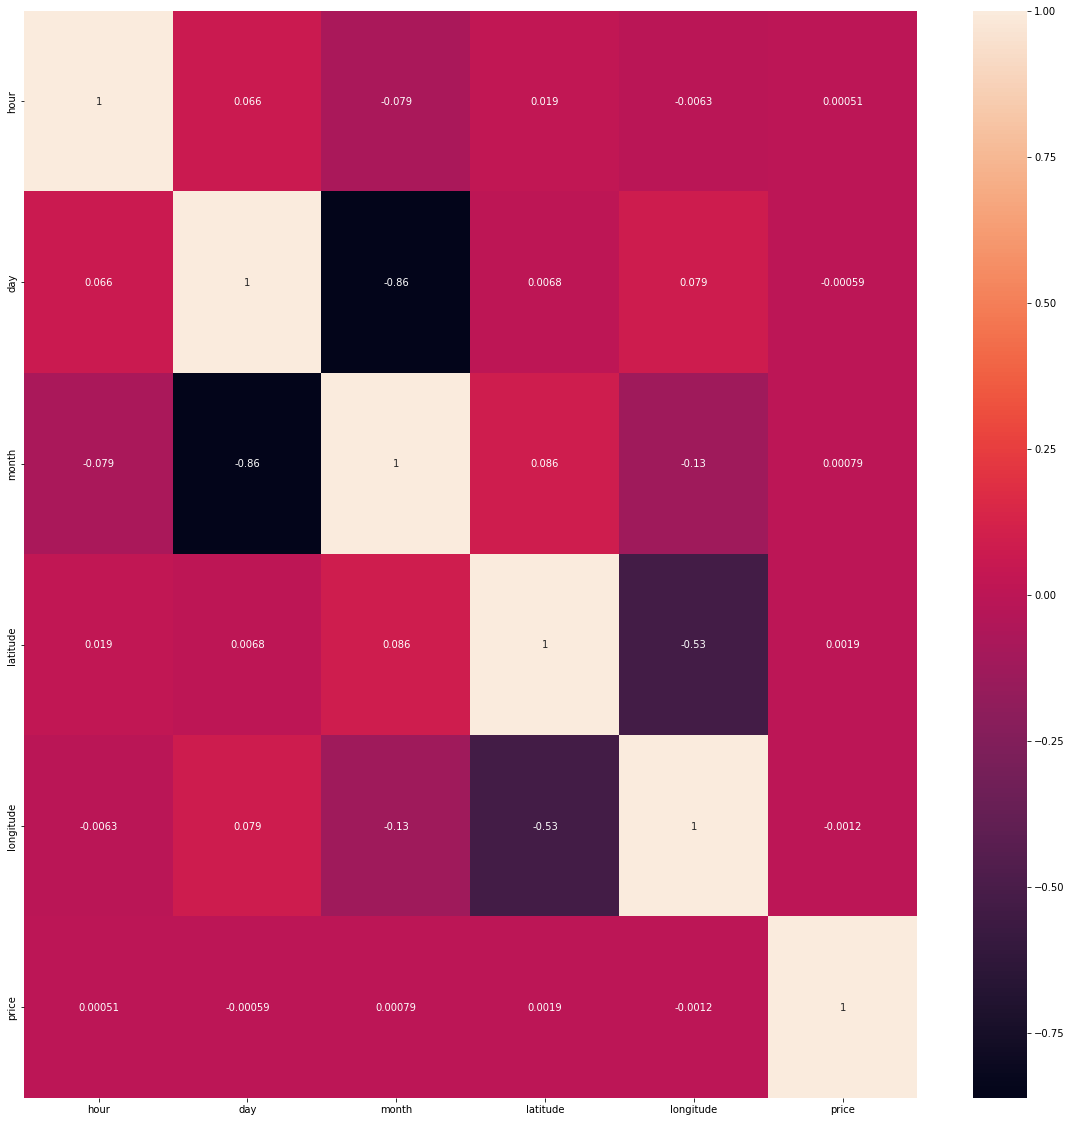

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_time.corr(),annot=True)

## Categorical Dengan Harga

In [ ]:
cat_col = ['source', 'destination','cab_type','name','short_summary','icon','price']
df_cat = df[cat_col]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

df_cat_encode

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
693066,11,6,1,11,6,5,13.0
693067,11,6,1,10,6,5,9.5
693068,11,6,1,8,6,5,13.5
693069,11,6,1,1,6,5,27.0


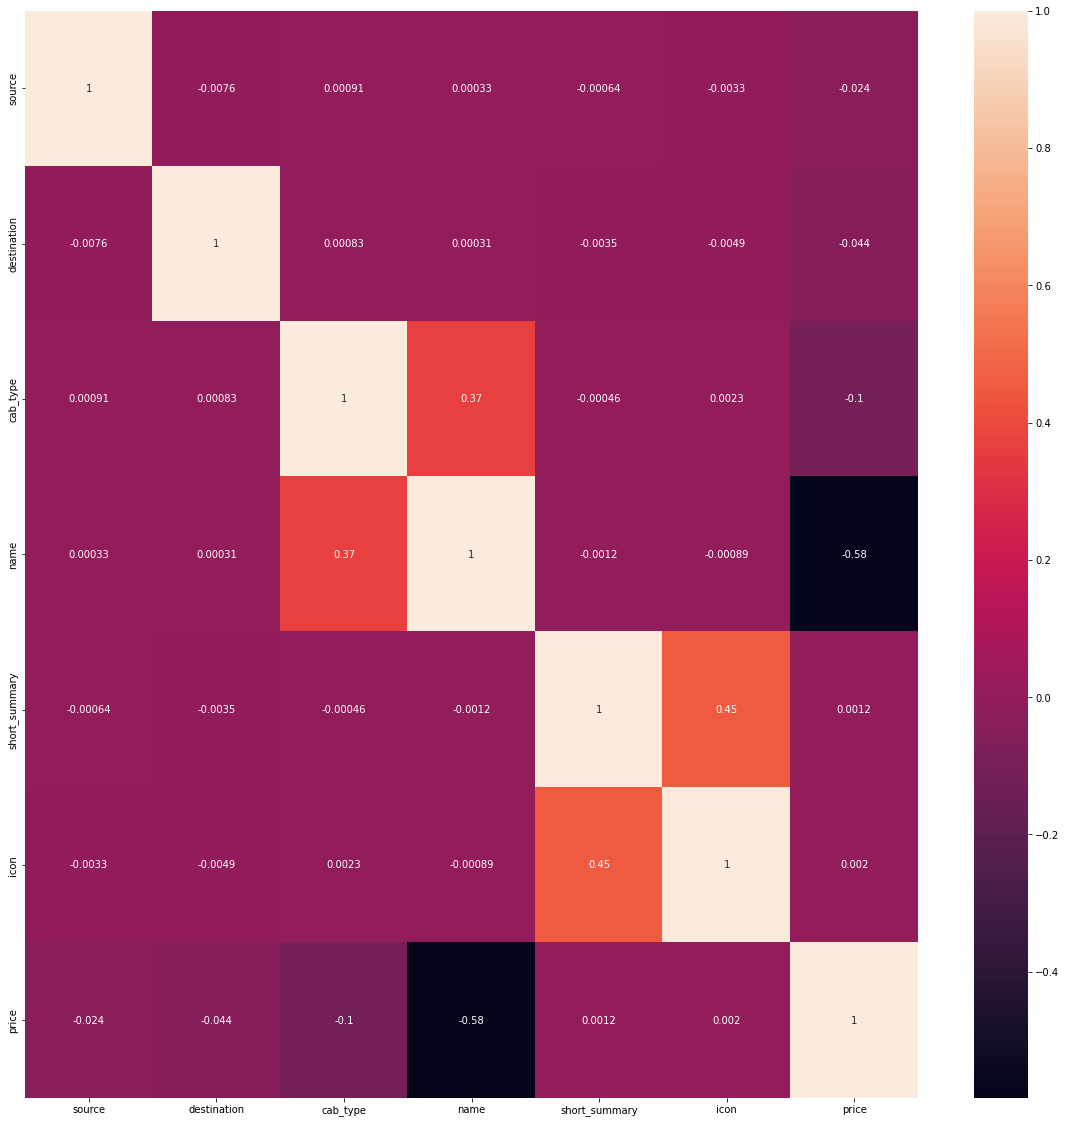

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

---
# Pengembangan Model

## Linear Regression

### Pendefinisian Model

In [ ]:
new_df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime',
                  'precipIntensity', 'precipProbability', 'humidity', 'windSpeed','windGust', 'visibility', 'dewPoint', 
                  'pressure', 'windBearing','cloudCover', 'uvIndex', 'ozone', 'moonPhase','precipIntensityMax','timezone',
                  'product_id','source','destination','short_summary','icon','hour','day','month','latitude','longitude', 
                  'temperature', 'apparentTemperature', 'temperatureHigh','temperatureHighTime', 'temperatureLow', 'apparentTemperatureHigh',
                  'apparentTemperatureLow', 'visibility.1', 'temperatureMin','temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax'
                  ],axis=1)

In [ ]:
new_df.shape

(693071, 5)

In [ ]:
new_df.columns

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')

### Encoding

In [ ]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [ ]:
new_df_onehot=new_df.copy()
for col in new_df_onehot.select_dtypes(include='O').columns:
    new_df_onehot=one_hot_encoder(new_df_onehot,col)
    
new_df_onehot.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
new_df_onehot.describe()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
count,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000
mean,16.303056,2.189430,1.013870,0.443545,0.556455,0.079494,0.079495,0.073925,0.073925,0.073925,0.073925,0.073925,0.073922,0.079494,0.079488,0.079493,0.079495,0.079495
std,8.983913,1.138937,0.091641,0.496803,0.496803,0.270508,0.270511,0.261648,0.261648,0.261648,0.261648,0.261648,0.261644,0.270508,0.270499,0.270506,0.270511,0.270511
min,2.500000,0.020000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.500000,1.280000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.500000,2.160000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.500000,2.920000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97.500000,7.860000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X = new_df_onehot.drop(columns=['price'],axis=1).values
y = new_df_onehot['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Modelling

In [ ]:
model = LinearRegression().fit(X_train,y_train)

In [ ]:
print(X)

[[0.44 1.   1.   ... 0.   0.   0.  ]
 [0.44 1.   1.   ... 0.   0.   0.  ]
 [0.44 1.   1.   ... 0.   0.   0.  ]
 ...
 [1.   1.   0.   ... 0.   0.   0.  ]
 [1.   1.   0.   ... 0.   0.   0.  ]
 [1.   1.   0.   ... 0.   0.   0.  ]]


In [ ]:
print(y)

[ 5.  11.   7.  ... 13.5 27.  10. ]


In [ ]:
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 6.8659668  36.74658203 12.8425293  ...  4.35620117 31.38183594
  2.59301758]


In [ ]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.9179016163920379
intercept: 1650342561811.5588
slope: [ 2.55533248e+00  1.82788886e+01 -1.39444949e+12 -1.67645849e+12
  2.61159263e+10  2.61159263e+10 -2.55893068e+11 -2.55893068e+11
 -2.55893068e+11 -2.55893068e+11 -2.55893068e+11 -2.55893068e+11
  2.61159263e+10  2.61159263e+10  2.61159263e+10  2.61159263e+10
  2.61159263e+10]


In [ ]:
prediction = model.intercept_ + np.sum(model.coef_*X_train, axis=1)
print('predicted response:', prediction, sep='\n')

predicted response:
[18.26098633 22.75927734 18.43994141 ... 17.95336914 17.13037109
 10.97998047]


In [ ]:
# r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9185614469864127

In [ ]:
# mse score
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

6.588367406430506
2.5667815268211873


In [60]:
filename = "linearRegression_model.pkl"
joblib.dump(model, filename)

['linearRegression_model.pkl']

In [61]:
loaded_model = joblib.load(filename)

In [62]:
loaded_model.predict([[0.44, 1.0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

array([10.15405273])

In [63]:
pickle.dump(model, open('linearRgression_model.pkl', 'wb'))

# Kesimpulan

Dari analisis tersebut penentuan harga ditentukan oleh jenis type_cab, distance, dan juga waktu (dalam jam). 

                                                    --- Selesai ---

---
